# Konvolüsyonel Ağlar

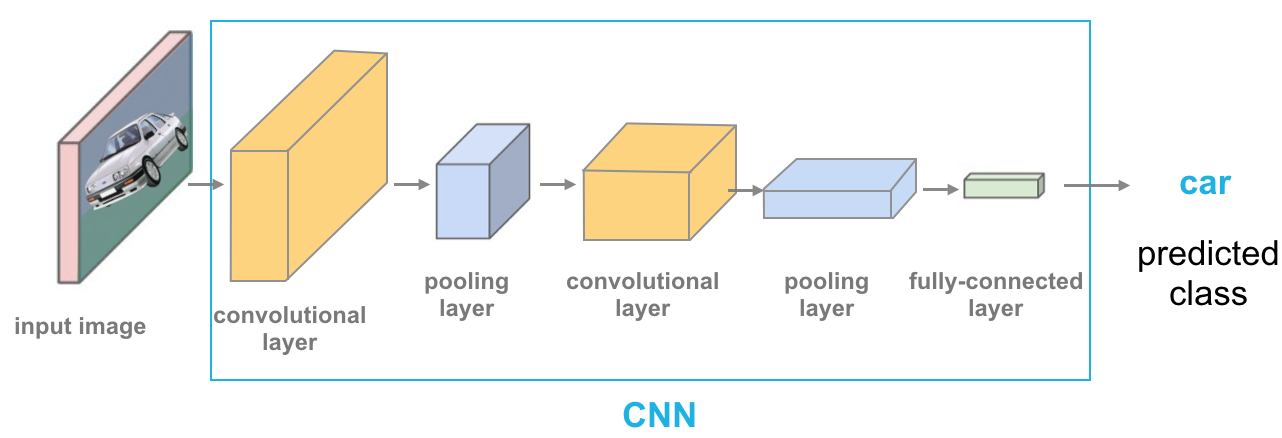

2 boyutta incelediğimiz konvolüsyon operatörü birden fazla katman olarak uyguladığımızda ve filtre değerlerini parametrik hale getirdiğimizde konvolüsyonel ağlar elde etmiş oluruz. Konvolüsyonel ağ katmanlarında birden fazla filtre yaygın bir şekilde uygulanır.

Konvolüsyonel ağlar yapısı gereği çok fazla parametre içerir ve parametre sayısının fazla olması bilgisayar işlem gücünü arttırır. Konvolüsyonel katmanlar arasında bulunan pooling katmanları bu parametre sayısını azaltmak için kullanılabilir. 

## CELEB A Veriseti

In [9]:
from PIL import Image
import matplotlib.pyplot as plt

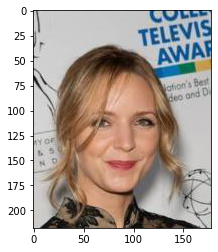

In [10]:
resim_kadın = Image.open("C:/Users/bilgisayar/Desktop/Conv_TUTO/veri/celebA/Train/kadın/Female/000092.jpg")
plt.imshow(resim_kadın)

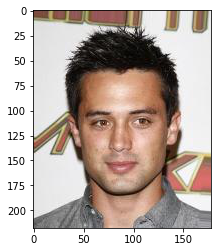

In [11]:
resim_erkek = Image.open("C:/Users/bilgisayar/Desktop/Conv_TUTO/veri/celebA/Train/erkek/Male/000007.jpg")
plt.imshow(resim_erkek)

## 2 Sınıflı Veriseti Sınıflandırma (CELEB A)

In [12]:
%matplotlib inline
import numpy as np # Matris işlemleri
import torch 
import matplotlib.pyplot as plt # Görselleştirme aracı
import torchvision
import torch.nn as nn # Neural network yapısında kullanılan yapıları yaratmamızı sağlar.
import torch.nn.functional as F # Neural network yapısında kullanılan yapıları yaratmamızı sağlar.
import torch.optim as optim # Optimizerları kullanmamıza yarar.
from torchvision import datasets # Datasetimizi indirmeye yarar.
import torchvision.transforms as transforms # Datamızı tenosrlere çevirmeye yarar
import math # matematik fonksiyonlarını kullanmamızı sağlar , exp/sqrt etc.

In [13]:
num_workers = 1
batch_size = 20

transform = transforms.Compose([
                                transforms.Resize(64),
                                transforms.CenterCrop(64),
                                transforms.ToTensor(),
                                transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5)),
    
])

kadın_data = torchvision.datasets.ImageFolder(root = "C:/Users/bilgisayar/Desktop/Conv_TUTO/veri/celebA/train/kadın",transform = transform)
erkek_data = torchvision.datasets.ImageFolder(root = "C:/Users/bilgisayar/Desktop/Conv_TUTO/veri/celebA/train/erkek",transform = transform)

erkek_data_loader = torch.utils.data.DataLoader(erkek_data,batch_size = batch_size,shuffle = True,num_workers = num_workers,drop_last = True)
kadın_data_loader = torch.utils.data.DataLoader(kadın_data,batch_size = batch_size,shuffle = True,num_workers = num_workers,drop_last = True)





In [655]:
dataiter = iter(kadın_data_loader)
images,labels = dataiter.next()
print(type(images))
print(images.shape)

<class 'torch.Tensor'>
torch.Size([20, 3, 64, 64])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


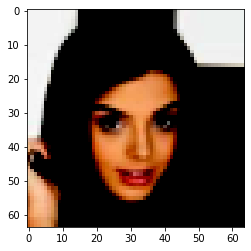

In [656]:
plt.imshow(np.transpose(images[1],(1,2,0)))

In [14]:
class CNN(nn.Module): #64x64x3 
    def __init__(self):
        super(CNN,self).__init__()
        self.cnn1 = nn.Conv2d(in_channels=3,out_channels =8, kernel_size =3 ,padding = 1)
        self.cnn2 = nn.Conv2d(in_channels=8,out_channels = 16,kernel_size =3 ,padding = 1)
        self.fc1 = nn.Linear(16*16*16,256)
        self.fc2 = nn.Linear(256,1)
        
        self.relu = nn.ReLU(0.2)
        
        self.maxpool = nn.MaxPool2d(kernel_size= 2)
        
    def forward(self,x):
        out = self.cnn1(x)
        out = self.relu(out)
        out = self.maxpool(out)#32x32x8
        out = self.cnn2(out)
        out = self.relu(out)
        out = self.maxpool(out)#16x16x16
        out = out.view(-1,16*16*16)
        out = self.fc1(out)
        out = self.relu(out)
        out = self.fc2(out)
        return out
        

In [15]:
model = CNN().cuda()

In [16]:
print(model)

CNN(
  (cnn1): Conv2d(3, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (cnn2): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=4096, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=1, bias=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
)


In [17]:
criterion = nn.MSELoss()

In [18]:
optimizer = optim.Adam(model.parameters(),lr =0.01)

In [663]:
epochs = 1
labels_erkek = torch.zeros(batch_size).cuda()
labels_kadın = torch.ones(batch_size).cuda()

for epoch in range(epochs):
    
    for (inputs,_) in erkek_data_loader:
        optimizer.zero_grad()
        inputs_erkek = inputs.cuda()
        outputs_erkek = model(inputs_erkek).view(-1)
        erkek_loss = criterion(outputs_erkek,labels_erkek)
        erkek_loss.backward()
        optimizer.step()
        
    for (inputs,_) in kadın_data_loader:
        optimizer.zero_grad()
        inputs_kadın = inputs.cuda()
        outputs_kadın = model(inputs_kadın).view(-1)
        kadın_loss = criterion(outputs_kadın,labels_kadın)
        kadın_loss.backward()
        optimizer.step()
        
    print(f"Epoch {epoch+1}")
    

Epoch 1


In [671]:
erkek_data_test = torchvision.datasets.ImageFolder(root="C:/Users/bilgisayar/Desktop/Conv_TUTO/veri/celebA/test/erkek", transform=transform)
kadın_data_test = torchvision.datasets.ImageFolder(root="C:/Users/bilgisayar/Desktop/Conv_TUTO/veri/celebA/test/kadın", transform=transform)
erkek_data_loader_test = torch.utils.data.DataLoader(erkek_data_test, batch_size=batch_size,shuffle = True, num_workers = num_workers,drop_last = True)
kadın_data_loader_test = torch.utils.data.DataLoader(kadın_data_test, batch_size=batch_size,shuffle = True, num_workers = num_workers,drop_last = True)

dataiter = iter(erkek_data_loader_test)
erkek,_ = dataiter.next()
erkek = erkek.to("cuda")
dataiter = iter(kadın_data_loader_test)
kadın,_ = dataiter.next() 
kadın = kadın.to("cuda")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


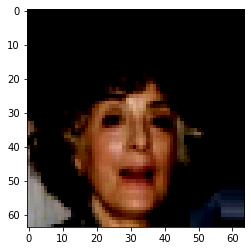

In [672]:
plt.imshow(np.transpose(kadın[1].cpu(),(1,2,0)))     

In [675]:
model.eval()
with torch.no_grad():
    print("erkek test :")
    erkekler = model(erkek)
    for i in range(batch_size):
        print("kadın" if erkekler[i] > 0.5 else "erkek")
    print("kadın test : ")
    kadınlar = model(kadın)
    for i in range(batch_size):
        print("kadın" if kadınlar[i] > 0.5 else "erkek")
    

erkek test :
kadın
kadın
kadın
kadın
kadın
kadın
kadın
kadın
kadın
kadın
kadın
kadın
kadın
kadın
kadın
kadın
kadın
kadın
kadın
kadın
kadın test : 
kadın
kadın
kadın
kadın
kadın
kadın
kadın
kadın
kadın
kadın
kadın
kadın
kadın
kadın
kadın
kadın
kadın
kadın
kadın
kadın


In [676]:
print(erkekler)

tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.]], device='cuda:0')


In [ ]:
print(kadınlar)

In [19]:
from pathlib import Path
import os

In [20]:
path = Path("C:/Users/bilgisayar/Desktop/Conv_TUTO/veri/celebA/veri")

In [21]:
list(path.iterdir())

[WindowsPath('C:/Users/bilgisayar/Desktop/Conv_TUTO/veri/celebA/veri/erkek'),
 WindowsPath('C:/Users/bilgisayar/Desktop/Conv_TUTO/veri/celebA/veri/kadın')]

In [22]:
Path.ls = lambda x: list(x.iterdir())

In [23]:
resim = Image.open(path/"kadın/180021.jpg")

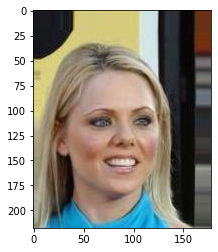

In [24]:
plt.imshow(resim)

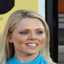

In [25]:
resim.resize((64,64)) 

In [26]:
erkek = [torch.tensor(np.transpose(np.array(Image.open(img).resize((64,64))),(2,0,1))).type(torch.FloatTensor) for img in (path/"erkek").ls()]

In [27]:
kadın = [torch.tensor(np.transpose(np.array(Image.open(img).resize((64,64))),(2,0,1))).type(torch.FloatTensor) for img in (path/"kadın").ls()]

In [28]:
len(erkek)

6238

In [29]:
len(kadın)

6792

In [30]:
kadın_stack, erkek_stack = torch.stack(kadın)/255, torch.stack(erkek)/255

In [31]:
kadın_stack.shape

torch.Size([6792, 3, 64, 64])

In [ ]:
class Dataset():
    def __init__(self,x,y,z,u) #kadın_stack,kadın_label,erkek_Stack,erkek_label
        self.x = torch.cat((x,z),0)
        self.y = torch.tensor([y]*len(x) + [u]*len(z))
    def __len__(self):
        return len(self.x)
    
    def __getitem__(self,i):
        return self.x[i],self.y[i]

In [76]:
veri = Dataset(kadın_stack,0,erkek_stack,1)

In [85]:
class DataLoader():
    def __init__(self,data,batch_size):
        self.data = data
        self.batch_size = batch_size
        
    def __iter__(self):
        lenn = len(self.data)
        rand = torch.randperm(lenn)
        
        for i in range(0,lenn,self.batch_size):
            idx = rand[i:i+self.batch_size]
            yield self.data[idx]

In [94]:
dataloader = DataLoader(veri,20)

In [95]:
dataiter = next(iter(dataloader))

In [99]:
dataiter[0][15]

tensor([[[0.9569, 0.9569, 0.9569,  ..., 0.5961, 0.5569, 0.8157],
         [0.9569, 0.9569, 0.9569,  ..., 0.6000, 0.5529, 0.8078],
         [0.9569, 0.9569, 0.9569,  ..., 0.6039, 0.5490, 0.8078],
         ...,
         [0.4902, 0.5059, 0.5020,  ..., 0.1294, 0.0588, 0.0235],
         [0.5843, 0.5647, 0.5686,  ..., 0.0314, 0.0078, 0.0000],
         [0.7255, 0.7176, 0.7137,  ..., 0.0039, 0.0000, 0.0039]],

        [[0.9412, 0.9412, 0.9412,  ..., 0.5569, 0.5137, 0.7725],
         [0.9412, 0.9412, 0.9412,  ..., 0.5569, 0.5098, 0.7647],
         [0.9412, 0.9412, 0.9412,  ..., 0.5608, 0.5059, 0.7647],
         ...,
         [0.3373, 0.3412, 0.3373,  ..., 0.0627, 0.0353, 0.0235],
         [0.4824, 0.4549, 0.4549,  ..., 0.0000, 0.0039, 0.0000],
         [0.6745, 0.6588, 0.6510,  ..., 0.0000, 0.0039, 0.0078]],

        [[0.9294, 0.9294, 0.9294,  ..., 0.5490, 0.5059, 0.7569],
         [0.9294, 0.9294, 0.9294,  ..., 0.5490, 0.5020, 0.7490],
         [0.9294, 0.9294, 0.9294,  ..., 0.5529, 0.4980, 0.

In [100]:
epochs = 10
model.train()
for epoch in range(epochs):
    for inputs in dataloader:
        input_veri = torch.from_numpy(np.asarray(inputs[0][:]))
        optimizer.zero_grad()
        input_veri = input_veri.cuda()
        outputs = model(input_veri).view(-1)
        labels = inputs[1][:].type_as(outputs)
        labels = labels.cuda()
        loss = criterion(outputs,labels)
        loss.backward()
        optimizer.step()
        
    print(f"Epoch : {epoch+1}")

Epoch : 1
Epoch : 2
Epoch : 3
Epoch : 4
Epoch : 5
Epoch : 6
Epoch : 7
Epoch : 8
Epoch : 9
Epoch : 10


In [103]:
model.eval()
with torch.no_grad():
    print("Test sonuçları ")
    x = next(iter(dataloader))
    sonuc = model((x[0][:]).cuda())
    print(sonuc)
    for i in range(20):
        print("0" if sonuc[i] < 0.5 else "1", end = ", ")
        
    print("Gerçek sonuçlar")
    print(x[1][:])

Test sonuçları 
tensor([[-0.0372],
        [ 1.0486],
        [ 0.3947],
        [ 0.0396],
        [ 0.8121],
        [-0.0039],
        [ 0.1621],
        [-0.1411],
        [ 0.1221],
        [ 1.0679],
        [-0.0187],
        [ 0.4178],
        [ 0.5398],
        [ 0.0895],
        [ 1.0231],
        [ 0.6028],
        [ 0.1798],
        [ 1.0512],
        [ 0.0890],
        [ 0.6693]], device='cuda:0')
0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, Gerçek sonuçlar
tensor([0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0])


## Çok sınıflı veri sınıflandırma (MNIST Rakam)

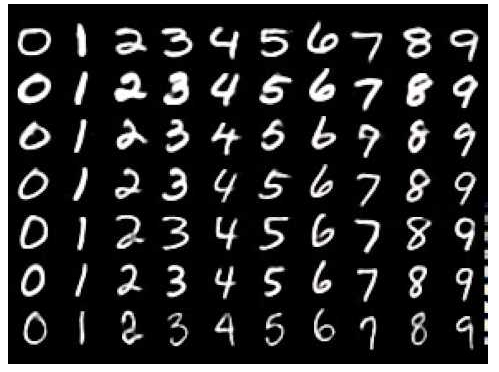

In [109]:
from torchvision import datasets
from torch.utils.data.sampler import SubsetRandomSampler
batch_size = 20 
val_per = 0.15
mean = 0.1307
std = 0.3081

transform = transforms.Compose([transforms.ToTensor(),
                                    transforms.Normalize((mean,),
                                                            (std,))])
train_data = datasets.MNIST(root="veri",train = True,download = True, transform=transform)
test_data = datasets.MNIST(root = "veri",train = False,download = True, transform = transform)


indices = torch.randperm(len(train_data))
split = int(np.floor(val_per*(len(train_data))))
t_idx, v_idx = indices[:split],indices[split:]

train_sampler = SubsetRandomSampler(t_idx)
val_sampler = SubsetRandomSampler(v_idx)


trainloader = torch.utils.data.DataLoader(train_data, batch_size=batch_size,
                                           num_workers = num_workers,drop_last = True,sampler = train_sampler)

validloader = torch.utils.data.DataLoader(train_data, batch_size=batch_size,
                                           num_workers = num_workers,drop_last = True,sampler = val_sampler)

testloader = torch.utils.data.DataLoader(test_data, batch_size=batch_size,
                                           num_workers = num_workers,drop_last = True)


C:\Users\bilgisayar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  if sys.path[0] == '':


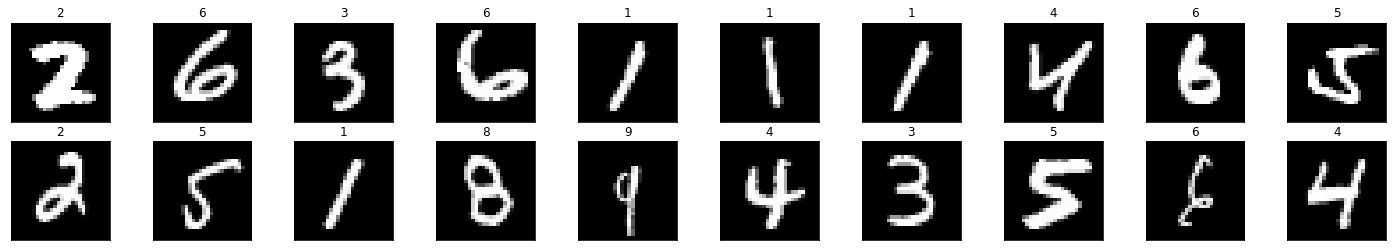

In [111]:
import matplotlib.pyplot as plt
%matplotlib inline
    
# obtain one batch of training images
dataiter = iter(trainloader)
images, labels = dataiter.next()
images = images.numpy()

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    # print out the correct label for each image
    # .item() gets the value contained in a Tensor
    ax.set_title(str(labels[idx].item()))

In [621]:
class CNN(nn.Module):
    
    def __init__(self):
            super(CNN,self).__init__()
            
            self.cnn1 = nn.Conv2d(in_channels=1, out_channels=8, kernel_size=3, stride=1, padding=1)
            self.batch_norm1 = nn.BatchNorm2d(8) # feature map = 8
        
            self.cnn2 = nn.Conv2d(in_channels=8, out_channels=32, kernel_size=5, stride=1, padding=2)
           
            self.batch_norm2 = nn.BatchNorm2d(32) #feature map = 32
            
            self.fc1 = nn.Linear(7*7*32,600)
            self.fc2 = nn.Linear(600,10)
            
            self.relu = nn.ReLU()
            self.maxpool = nn.MaxPool2d(kernel_size = 2)

    def forward(self,x):
            out = self.cnn1(x)
            out = self.batch_norm1(out)
            out = self.relu(out)
            out = self.maxpool(out)
            out = self.cnn2(out)
            out = self.batch_norm2(out)
            out = self.relu(out)
            out = self.maxpool(out)
            # flattening:
            out = out.view(-1,1568)
            out = self.fc1(out)
            out = self.relu(out)
            out = self.fc2(out)
            return out

In [622]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = CNN().to(device)

criterion = nn.CrossEntropyLoss()

optimizer = optim.Adam(model.parameters(), lr=0.01)

In [625]:
n_epochs = 10

valid_loss_min = np.Inf
for epoch in range(1, n_epochs+1):

    train_loss = 0.0
    valid_loss = 0.0

    model.train()
    for data, target in trainloader:
        data, target = data.cuda(), target.cuda()
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()*data.size(0)

    model.eval()
    for data, target in validloader:   
        data, target = data.cuda(), target.cuda()
        output = model(data)
        loss = criterion(output, target)
        valid_loss += loss.item()*data.size(0)
        
    train_loss = train_loss/len(trainloader.sampler)
    valid_loss = valid_loss/len(validloader.sampler)

    print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
        epoch, train_loss, valid_loss))

    if valid_loss <= valid_loss_min:
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
        valid_loss_min,
        valid_loss))
        torch.save(model.state_dict(), 'model.pt')
        valid_loss_min = valid_loss

Epoch: 1 	Training Loss: 2.351460 	Validation Loss: 2.348296
Validation loss decreased (inf --> 2.348296).  Saving model ...
Epoch: 2 	Training Loss: 2.351415 	Validation Loss: 2.348875
Epoch: 3 	Training Loss: 2.351267 	Validation Loss: 2.348638
Epoch: 4 	Training Loss: 2.351316 	Validation Loss: 2.347652
Validation loss decreased (2.348296 --> 2.347652).  Saving model ...
Epoch: 5 	Training Loss: 2.351389 	Validation Loss: 2.348245
Epoch: 6 	Training Loss: 2.351374 	Validation Loss: 2.348864
Epoch: 7 	Training Loss: 2.351446 	Validation Loss: 2.347780
Epoch: 8 	Training Loss: 2.351460 	Validation Loss: 2.347401
Validation loss decreased (2.347652 --> 2.347401).  Saving model ...
Epoch: 9 	Training Loss: 2.351366 	Validation Loss: 2.347035
Validation loss decreased (2.347401 --> 2.347035).  Saving model ...
Epoch: 10 	Training Loss: 2.351298 	Validation Loss: 2.347402


In [652]:
model.eval()
testloss = 0
dogru = 0
with torch.no_grad():
    for i,(data, target) in enumerate(testloader):   
            data, target = data.cuda(), target.cuda()
            output = model(data)
            loss = criterion(output, target)
            testloss += loss.item()
            _, predicted=torch.max(output,1)
            correct += (predicted == target).sum().item()
            
print(correct/i*batch_size)                  
#testloss = testloss/len(testloader)
#print(f"asd {dogru} ")
#print('Test Loss: {:.6f}'.format(testloss))

98.31663326653306
